# Description

# Environment

## Library Imports

In [1]:
import os
import gc
gc.enable()

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

%matplotlib inline
plt.style.use('ggplot')

## Local Imports

In [2]:
from phuc import data_process, file
from phuc import visualization as vs

## Reload data path

In [3]:
from phuc.file import standard_template

standard_template.save_data_path(os.getcwd().split('/src')[0])

Loaded file data_path.pkl
Directory  /home/phuc/Desktop/Work/Data Sience/Epidemic Modeling/MathModel  already exists
Saved file data_path.pkl


##  Setup Pandas

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Set up data path

In [5]:
CURR_DIR = os.getcwd().split('/src')[0]

In [6]:
dir_path = file.load_pickle(CURR_DIR + '/data_path.pkl')['DIRS']
file_path = file.load_pickle(CURR_DIR + '/data_path.pkl')['FILES']

Loaded file data_path.pkl
Loaded file data_path.pkl


# Code

## Load data

In [23]:
EU_population = file.load_pickle(file_path['EU_POPULATION_PKL_PATH'])

EU_confirmed = file.load_pickle(file_path['EU_CONFIRMED_PKL_PATH'])

EU_death = file.load_pickle(file_path['EU_DEATH_PKL_PATH'])

EU_recover = file.load_pickle(file_path['EU_RECOVERED_PKL_PATH'])

Loaded file EU_population.pkl
Loaded file EU_confirmed.pkl
Loaded file EU_death.pkl
Loaded file EU_recovered.pkl


__The EU nations' population and population density varies noticably.__

<Figure size 1152x864 with 0 Axes>

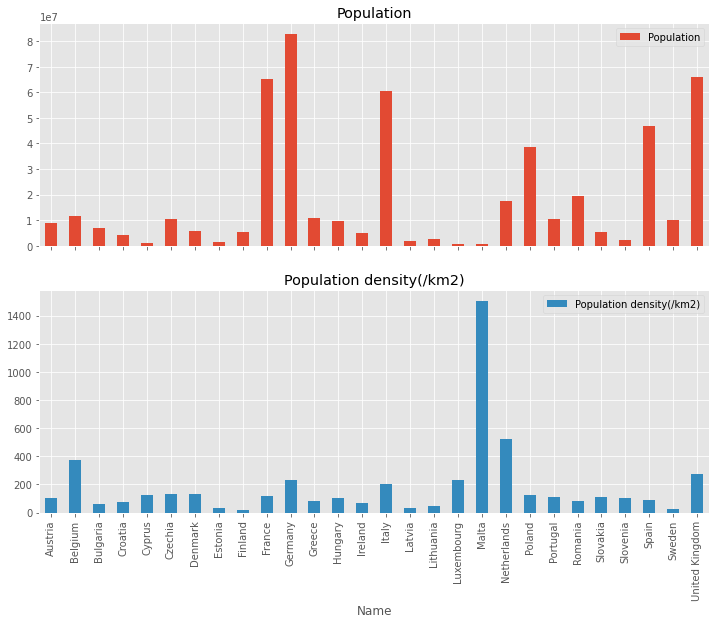

In [10]:
EU_population.sort_values('Name',inplace=True)


plt.figure(figsize=[16,12])

EU_population.plot.bar(x = 'Name', 
                       y= ['Population','Population density(/km2)'],
                       subplots=True, figsize =[12,9]);

## EU COVID-19 case on 07/08/2020

In [57]:
EU_07_08_2020 = EU_confirmed[['Country/Region','7/8/20']]

EU_07_08_2020 = EU_07_08_2020.rename(columns={'7/8/20':'Confirmed'})

EU_07_08_2020 = pd.concat([EU_07_08_2020, EU_recover['7/8/20']], axis =1)

EU_07_08_2020 = EU_07_08_2020.rename(columns={'7/8/20':'Recover'})

EU_07_08_2020 = pd.concat([EU_07_08_2020, EU_death['7/8/20']], axis =1)

EU_07_08_2020 = EU_07_08_2020.rename(columns={'7/8/20':'Death'})

EU_07_08_2020.set_index('Country/Region',inplace = True)


As we review the data, some countries actually do not have the actual number of recovered case, So we decide to remove :

+ United Kingdom
+ Sweden
+ Netherlands

Due to the large different in number of cases between country, we will choose country that had more than 5000 confirmed cases on 07/08/2020 

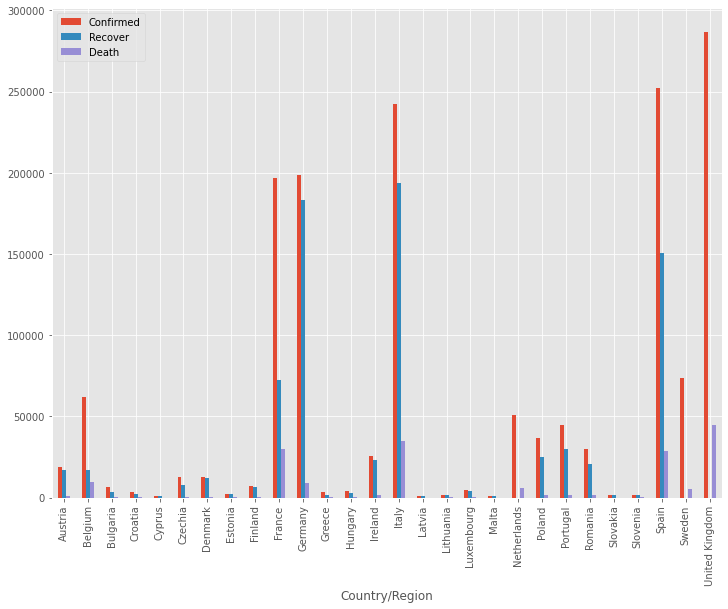

In [58]:
EU_07_08_2020.plot.bar(figsize =[12,9])

In [59]:
EU_07_08_2020.drop(['United Kingdom','Sweden','Netherlands'],
                   inplace =True)

EU_07_08_2020 = EU_07_08_2020[EU_07_08_2020['Confirmed'] > 5000]

EU_07_08_2020.plot.bar(figsize =[12,9])

# The confirmed case of some EU nations over times:

In [153]:
# get countries that will be used to analysed
countries = EU_07_08_2020.index.values

In [171]:
for df_name, df in [['confirmed', EU_confirmed],
                    ['recovered', EU_recover],
                    ['death', EU_death]]:
    
    dat = df[df['Country/Region'].isin(countries)]\
          .reset_index(drop=True)

    # Tranpose Data
    dat = dat.T

    # change columns name
    dat.columns = dat.iloc[0]
    dat.columns.name = None

    dat.drop('Country/Region',axis = 0, inplace =True)

    # new column Date
    dat.reset_index(inplace = True)
    dat.rename(columns = {'index':'Date'}, inplace = True)

    # convert string to datetime type
    dat['Date'] = pd.to_datetime(dat['Date'], format='%m/%d/%y')
    
    dat.to_csv(dir_path['PROCESSED_DIR'] + '/' + df_name +'.csv', index =False)
    file.save_pickle(dir_path['PROCESSED_DIR'] + '/' + df_name +'.pkl', dat)

Directory  /home/phuc/Desktop/Work/Data Sience/Epidemic Modeling/MathModel/data/processed  already exists
Saved file confirmed.pkl
Directory  /home/phuc/Desktop/Work/Data Sience/Epidemic Modeling/MathModel/data/processed  already exists
Saved file recovered.pkl
Directory  /home/phuc/Desktop/Work/Data Sience/Epidemic Modeling/MathModel/data/processed  already exists
Saved file death.pkl


In [166]:
fig = px.line(dat, x='Date', y=countries)
fig.show()

# Colab Settings

## Connect Drive

In [ ]:
from google.colab import drive 
# conncent phuc.phan1012000@hcmut.edu.vn

# default location for the drive
ROOT = "/content/drive"            
drive.mount(ROOT)   

## Load Library

In [ ]:
import sys
import os
# Load my phuc's library
sys.path.append("/content/drive/My Drive/Work/Data_Science_Library")

## Setup Project

In [ ]:
GIT_REPOSITORY = "kalapa-s-CreditScore"
# path to project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Work/Projects'
PROJECT_PATH = os.path.join(ROOT, MY_GOOGLE_DRIVE_PATH,GIT_REPOSITORY)

# GO TO WORKING PROJECT PATH
os.chdir(PROJECT_PATH+'/src')
os.remove(PROJECT_PATH+'/data_path.pkl')